<a href="https://colab.research.google.com/github/ra2309/AIWorkshop/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section is related to reading and mounting data from Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/MyDrive/Welllogs')

The first step after mounting data is to ignest them. In most industries, it is suffcieient to read only csv, excel and other formats. In oil/gas industry, there are, however, many file formats not readable naturally by pandas or numpy. Thus, we utilize 3rd party libraries like lasio to read las files. We start by installing lasio.

In [3]:
!pip install lasio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.7 MB/s eta 0:00:00


For the purpose of testing mounting and ingestion, we read one sample file.

In [4]:
import lasio
las=lasio.read('1052987184.las')

lasio library enables to transform data into a pandas dataframe.

In [5]:
df = las.df()

In [6]:
df.head()

,ABHV,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,TBHV,MEL15,MEL20,MELCAL
DEPT,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,22.9799,NaN,NaN,100000.0,1.0667,2062.7507,151.6998,-91.4477,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,24.3601,NaN,NaN,100000.0,4.0241,3293.4761,133.4111,-66.0708,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,26.1486,NaN,NaN,100000.0,100000.0000,3339.4282,132.8695,-55.1717,NaN,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,28.5913,NaN,NaN,100000.0,100000.0000,3339.6782,132.8666,-50.0492,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,31.5497,NaN,NaN,100000.0,100000.0000,3339.6782,132.8666,-47.8064,NaN,NaN,NaN,NaN


Now, we go ahead and read whole set of data. We create an empty list of dataframes where we will append single dataframe read from las.

In [ ]:
dfs = []
for file in os.listdir():
  print(file)
  las = lasio.read(file)
  df = las.df()
  dfs.append(df)

1052987184.las
1052987195.las
1052987201.las
1052987218.las
1052987223.las
1052987227.las
1052987231.las
1052987237.las
1052987257.las
1052997244.las
1053009232.las
1053011951.las
1053014529.las
1053017310.las
1053051790.las
1053051791.las
1053051799.las
1053051804.las
1053076196.las
1053076205.las
1053076219.las
1053076225.las
1053136713.las
1053145757.las
1053192852.las
1053192858.las
1053225933.las
1053230972.las
1053239547.las
1053239553.las
1053240861.las
1053240866.las
1053240894.las
1053240902.las
1053243844.las
1053243845.las
1053243853.las
1053243854.las
1053243857.las
1053244666.las
1053246764.las
1053247619.las
1053251243.las
1053251247.las
1053251280.las
1053253945.las
1053253979.las
1053262500.las
1053262508.las
1053263309.las
1053263319.las
1053264006.las
1053268121.las
1053271825.las
1053271839.las
1053271848.las
1053271856.las
1053271865.las
1053276018.las
1053281971.las
1053282080.las
1053282085.las
1053285821.las
1053286544.las
1053292672.las


KeyError: ignored

We discovered an error which is a natural situation in automation and machine learning workflow. I printed list of files and shown the file that is troublesome. Now, if we open it with a text editor we will clearly see the error reason. We try one more time this time with try and except. In addition, to identify different wells from each other in this dataframe, we record name of the well.

In [7]:
dfs = []
for file in os.listdir():
  try:
    las = lasio.read(file)
    df = las.df()
    df['WELL'] = file.split('.las')[0]
    dfs.append(df)
  except Exception as e:
    print(file)
    print(e)

1053292672.las
'No ~ sections found. Is this a LAS file?'


Now, we convert list of dfs into a one single dataframe with a command called concat.

In [8]:
import pandas as pd
df = pd.concat(dfs)

# EDA

In [ ]:
df.describe()

In [9]:
df.head()

,ABHV,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,...,DPHL,PEF,NPHL,PXND,MINV,MNOR,DPHS,NPHS,DPHD,NPHD
DEPT,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,22.9799,NaN,NaN,100000.0,1.0667,2062.7507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,24.3601,NaN,NaN,100000.0,4.0241,3293.4761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,26.1486,NaN,NaN,100000.0,100000.0000,3339.4282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,28.5913,NaN,NaN,100000.0,100000.0000,3339.6782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,31.5497,NaN,NaN,100000.0,100000.0000,3339.6782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We check number of columns that are there.

In [10]:
df.columns

Index(['ABHV', 'CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM',
       'RLL3', 'RXORT', 'SP', 'TBHV', 'MEL15', 'MEL20', 'MELCAL', 'WELL',
       'MINMK', 'PE', 'AVTX', 'BVTX', 'DT', 'ITT', 'SPOR', 'CILD', 'CNDL',
       'CNLS', 'CNSS', 'LSPD', 'LTEN', 'MCAL', 'MI', 'MN', 'DEVI', 'DTMP',
       'NPOR', 'GK1', 'IA10_2', 'IA20_2', 'IA30_2', 'IA60_2', 'IA90_2',
       'CIA90_2', 'RXO_2', 'RT_2', 'CALI', 'DRHO', 'DPHL', 'PEF', 'NPHL',
       'PXND', 'MINV', 'MNOR', 'DPHS', 'NPHS', 'DPHD', 'NPHD'],
      dtype='object')

We run count to check number of missing values there. In addition, we compare that to shape of array.

In [11]:
df.shape

(693010, 57)

In [12]:
df.count()

ABHV       137493
CNPOR      382507
DCAL       438320
DPOR       430143
GR         573870
RHOB       388833
RHOC       429901
RILD       681552
RILM       681713
RLL3       680997
RXORT      301043
SP         690601
TBHV        84687
MEL15      114231
MEL20      114225
MELCAL     151083
WELL       693010
MINMK       86552
PE         112169
AVTX       338593
BVTX       338593
DT         262227
ITT        262237
SPOR       262227
CILD       221297
CNDL       219252
CNLS       219252
CNSS       219252
LSPD       221296
LTEN       213403
MCAL       215853
MI         221926
MN         221926
DEVI        71467
DTMP        65039
NPOR        45242
GK1        111916
IA10_2       9391
IA20_2       9391
IA30_2       9391
IA60_2       9391
IA90_2       9391
CIA90_2      9391
RXO_2        9391
RT_2         9391
CALI         4484
DRHO         4478
DPHL         4478
PEF          4473
NPHL         4458
PXND         4458
MINV         4438
MNOR         4438
DPHS         4478
NPHS         4458
DPHD      

In [13]:
(df.count()/len(df))>.6

ABHV       False
CNPOR      False
DCAL        True
DPOR        True
GR          True
RHOB       False
RHOC        True
RILD        True
RILM        True
RLL3        True
RXORT      False
SP          True
TBHV       False
MEL15      False
MEL20      False
MELCAL     False
WELL        True
MINMK      False
PE         False
AVTX       False
BVTX       False
DT         False
ITT        False
SPOR       False
CILD       False
CNDL       False
CNLS       False
CNSS       False
LSPD       False
LTEN       False
MCAL       False
MI         False
MN         False
DEVI       False
DTMP       False
NPOR       False
GK1        False
IA10_2     False
IA20_2     False
IA30_2     False
IA60_2     False
IA90_2     False
CIA90_2    False
RXO_2      False
RT_2       False
CALI       False
DRHO       False
DPHL       False
PEF        False
NPHL       False
PXND       False
MINV       False
MNOR       False
DPHS       False
NPHS       False
DPHD       False
NPHD       False
dtype: bool

We select columns that are mostly filled.

In [14]:
cols_to_delete = df.columns[df.isnull().sum()/len(df) > .60]

In [15]:
df.drop(cols_to_delete, axis = 1, inplace = True)

<ipython-input-16-748c49e9e4c2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


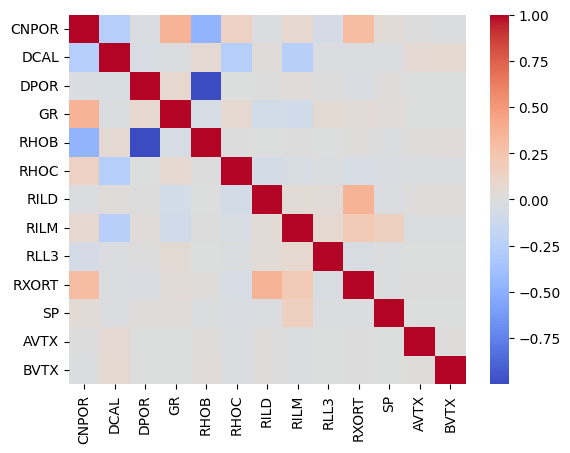

In [16]:
bimport seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

# Missing Values

Now, we need to take care of missiing values. One way is to interpolate values to nearest value.

In [18]:
lst = df.columns.tolist()
lst.remove('WELL')

In [20]:
for c in lst:
  df[c]=df.groupby('WELL',group_keys=False)[c].apply(lambda group: group.interpolate())

In [21]:
df.count()

CNPOR    387744
DCAL     441593
DPOR     433964
GR       580058
RHOB     392108
RHOC     433918
RILD     682086
RILM     681733
RLL3     681976
RXORT    301230
SP       691801
WELL     693010
AVTX     338691
BVTX     338691
dtype: int64

Another way is fo fillna for each well with the median/mode/mean value in each well.

In [22]:
for c in lst:
  df[c].fillna(df.groupby('WELL')[c].transform('median'),inplace=True)

Anohter way is to use knn-imputer which predicts missing values using KNN algorithm. However, it is much slower than other methods.

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit_transform(df)

KeyboardInterrupt: ignored

In [23]:
df.count()

CNPOR    562128
DCAL     544819
DPOR     683619
GR       580077
RHOB     571519
RHOC     683619
RILD     683619
RILM     683619
RLL3     683619
RXORT    409829
SP       693010
WELL     693010
AVTX     430326
BVTX     430326
dtype: int64

That worked for some values. What reamains is to fill with global median for each value.

In [24]:
for c in lst:
  df[c].fillna(df[c].median(),inplace=True)

In [25]:
df.count()

CNPOR    693010
DCAL     693010
DPOR     693010
GR       693010
RHOB     693010
RHOC     693010
RILD     693010
RILM     693010
RLL3     693010
RXORT    693010
SP       693010
WELL     693010
AVTX     693010
BVTX     693010
dtype: int64

# Scaling

Now, we want to use scaling on these values. There is standard scaler and minmax scaler, and robust scaler. There are also other types not covered in this workshop. Standard scaler is easy to implement which also applies to minmax. The difference is that standard scaler will turn mean to 0 with 1 unit variance which in some cases we would like to avoid so we use minmax scaler. However, both assume dataset is normally distributed. However, robust scaler avoids that and capable of transforming data that is not normally distributed.

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaled_features = scaler.fit_transform(df[lst])

In [29]:
data = pd.DataFrame(scaled_features,index=df.index,columns=lst)

# ML

We choose a label, let's say GR.

In [30]:
X = data.drop('GR',axis=1)
y = data['GR']

We train test split data.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

Since GR is continues, we need to select a regression model. Let's try linear regression.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.08770891750871623

That was awful. It is usual for decision tree to work well with well logs.

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7477264123826431

Another good algorithm is xgboost but it requires hyperparemeter tuning.

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.6284939321599494

Now, we perfrom randomized search tree for sake of time. There is also grid search. The difference between two is grid search searches over all hyperparmeters. It is time consuming but will reach optimal results compared to randomized search. Randomized search is much faster which selects random hyperparmters. I advise to use randomized search first then grid search on few hyperparematers.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
params = {'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
rs_model=RandomizedSearchCV(reg,param_distributions=params,n_iter=5,scoring='r2',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [ ]:
rs_model.cv_results_

{'mean_fit_time': array([198.7408752 , 299.43214898,  90.67391682,  42.32047143,
        151.5681766 ]),
 'std_fit_time': array([11.00716488,  4.00195815,  0.81949295,  0.46567921, 21.94616565]),
 'mean_score_time': array([3.63930688, 1.86459208, 0.40070491, 0.24365067, 1.04134655]),
 'std_score_time': array([1.02187753, 0.37134148, 0.02748577, 0.07769393, 0.29570219]),
 'param_min_child_weight': masked_array(data=[1, 7, 3, 5, 3],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[15, 15, 6, 3, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.25, 0.3, 0.15, 0.15, 0.15],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.4, 0.3, 0.2, 0.0, 0.0],
              mask=[False, False, False, False, F

In [ ]:
rs_model.best_estimator_.score(X_test,y_test)

0.7967395689412567

# Inference

Now, we graph predicted results for a single well.

In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df.columns

Index(['DEPT', 'CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM',
       'RLL3', 'RXORT', 'SP', 'WELL', 'AVTX', 'BVTX'],
      dtype='object')

In [37]:
df.reset_index(inplace=True)

In [41]:
df.WELL.unique()

array(['1052987184', '1052987195', '1052987201', '1052987218',
       '1052987223', '1052987227', '1052987231', '1052987237',
       '1052987257', '1052997244', '1053009232', '1053011951',
       '1053014529', '1053017310', '1053051790', '1053051791',
       '1053051799', '1053051804', '1053076196', '1053076205',
       '1053076219', '1053076225', '1053136713', '1053145757',
       '1053192852', '1053192858', '1053225933', '1053230972',
       '1053239547', '1053239553', '1053240861', '1053240866',
       '1053240894', '1053240902', '1053243844', '1053243845',
       '1053243853', '1053243854', '1053243857', '1053244666',
       '1053246764', '1053247619', '1053251243', '1053251247',
       '1053251280', '1053253945', '1053253979', '1053262500',
       '1053262508', '1053263309', '1053263319', '1053264006',
       '1053268121', '1053271825', '1053271839', '1053271848',
       '1053271856', '1053271865', '1053276018', '1053281971',
       '1053282080', '1053282085', '1053285821', '10532

In [42]:
df_w = df[df['WELL']=='1052987184']

In [47]:
df_w['GRy'] = dt.predict(df_w.drop(['GR','WELL','DEPT'],axis=1))

<ipython-input-47-1d066acebc5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['GRy'] = dt.predict(df_w.drop(['GR','WELL','DEPT'],axis=1))


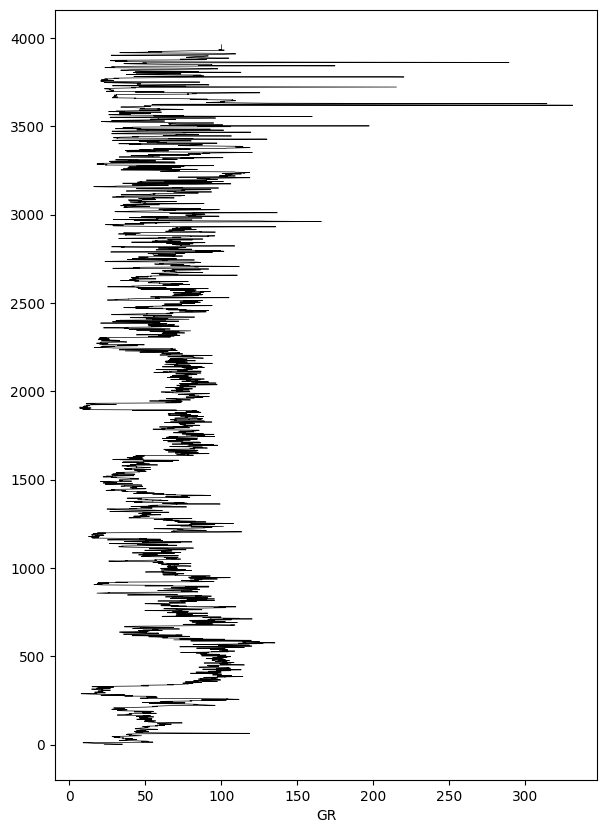

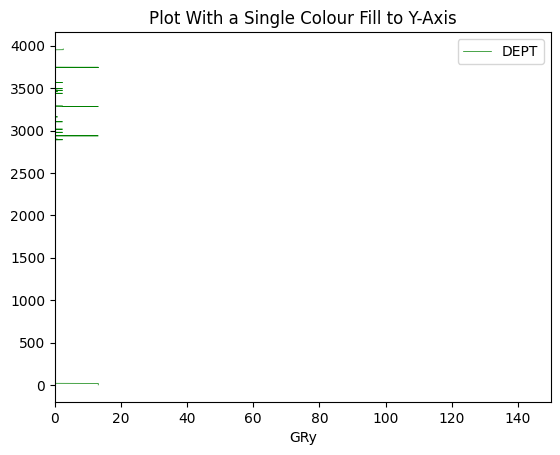

In [49]:
df_w.plot(x='GR', y='DEPT', c='black', lw=0.5, legend=False, figsize=(7,10))

#plt.fill_betweenx(df_w['DEPT'], df_w['GR'], 0, facecolor='green')
#plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title('Plot With a Single Colour Fill to Y-Axis')
plt.show()

# Dimensionality Reduction

It can be used to reduce dimensions of a big dataset (seismic) for example.